In [62]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#this way we can visualize in the notebook
%matplotlib inline 

In [3]:
events = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/events_England.json")
matches = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/matches_England.json")
teams = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/teams.json")
players = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/players.json")

### Part 1 of CRQ 1

In [4]:
events = events[["matchPeriod", "eventSec", "tags", "subEventId", "matchId", "eventName", "teamId", "playerId"]]

In [5]:
# Transform seconds into minutes
events["eventMin"] = events.apply(lambda row: row.eventSec/60+45 if row.matchPeriod == "2H" else row.eventSec/60, axis= 1) 

In [6]:
# We decided to put in the bin [36-45) all the goals that were scored at 45+ of the first half of the game
events.loc[(events['eventMin']> 45) & (events["matchPeriod"] == '1H'), ['eventMin']] = 45

In [8]:
# now we have to keep only the events with tag 101 = Goal that were succesful tag 1801
# some indexes have an empty tag []
events['goal'] = events.apply(lambda row: (1 if (row.tags[0]['id'] == 101) & (row.tags[-1]['id'] == 1801) else 0) if row.tags != [] else 0, axis=1)

In [9]:
# we kept the goals that were scored
events = events[events.goal != 0]

In [58]:
# let's set up the bins 
goals = events
bins = [0,9,18,27,36,45,54,63,72,81,90,103]
#use pd.cut function can attribute the values into its specific bins
goals["bins"] = pd.cut(events["eventMin"], bins) 

In [59]:
goals = goals[["bins", "goal"]]

In [60]:
goals.groupby(['bins']).sum() #just to double check

,goal
bins,
"(0, 9]",70
"(9, 18]",75
"(18, 27]",85
"(27, 36]",72
"(36, 45]",111
"(45, 54]",104
"(54, 63]",101
"(63, 72]",100
"(72, 81]",115


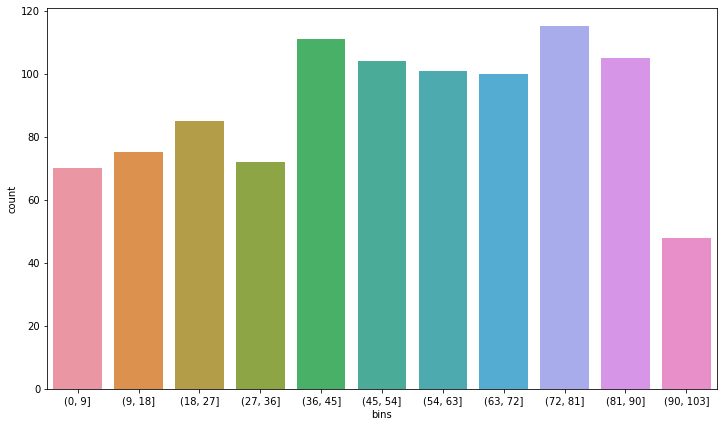

In [63]:
plt.figure(figsize=(12,7))
goal_plot = sns.countplot(x="bins", data=goals)

### Part 2 CRQ1

In [64]:
# let's set up the bins 
top10 = events
bins = [81,90]
#use pd.cut function can attribute the values into its specific bins
top10["bins"] = pd.cut(top10["eventMin"], bins) 

In [65]:
top10 = events[["teamId", "bins", "goal"]]
top10 = top10.dropna()

In [66]:
top10 = top10.groupby(["teamId"]).sum() # we are grouping by teamId

In [67]:
top10 = top10.sort_values("goal", ascending=False).head(10)

In [68]:
# now we are going to merge the teamsID between top10 and teams to ge the name 
top10_name = top10.merge(teams, left_on='teamId', right_on='wyId') 

In [69]:
top10_name = top10_name[["goal", "officialName"]]
top10_name

,goal,officialName
0,13,Manchester City FC
1,11,Arsenal FC
2,9,Manchester United FC
3,9,Chelsea FC
4,7,Watford FC
5,7,Crystal Palace FC
6,7,Liverpool FC
7,6,West Ham United FC
8,5,Tottenham Hotspur FC
9,5,AFC Bournemouth


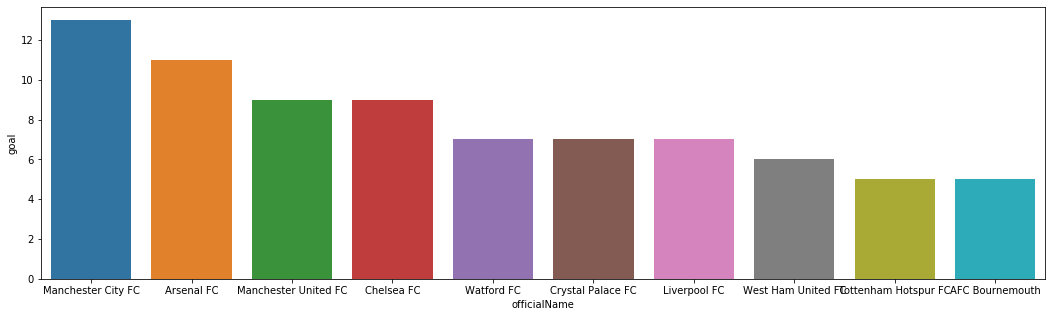

In [70]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x="officialName", y="goal", data=top10_name)

### Part 3 CRQ1

In [12]:
players = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/players.json")
events = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/events_England.json")

In [56]:
df3 = events

In [14]:
# let's set up the bins 
goals_scored = events
bins = [0,9,18,27,36,45,54,63,72,81,90,103]
#use pd.cut function can place the values into its specific bins
goals_scored["bins"] = pd.cut(df3["eventMin"], bins) 

In [15]:
goals_scored = goals_scored[["playerId", "bins", "eventMin"]]

In [17]:
df = pd.crosstab(index=[goals_scored['bins']],columns=[goals_scored['playerId']],margins=False)

In [20]:
df = df.astype(bool).astype(int)

In [21]:
goal_period = df.sum(axis = 0)

In [22]:
s = goal_period > 8

In [49]:
player = pd.DataFrame({'playerId':s.index})

In [51]:
crq1_3 = player.merge(players, left_on='playerId', right_on='wyId') 

In [55]:
crq1_3["shortName"]

0    \u00c1lvaro Morata
1             R. Lukaku
2               H. Kane
3           R. Sterling
4              J. Vardy
5         Mohamed Salah
Name: shortName, dtype: object